In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [3]:
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
df.shape

(365, 7)

In [5]:
df.isnull().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

/home/guicttram/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_media'>

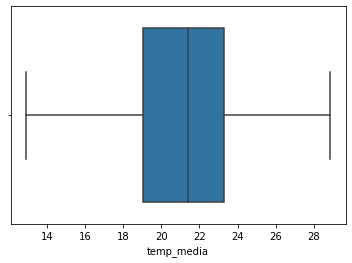

In [6]:
sns.boxplot(df['temp_media'])

In [7]:
for column in df.columns[1:]:
    print('Valores coluna: ', column)
    print(pd.cut(df[column], bins=3).value_counts())
    print('\n\n')

Valores coluna:  temp_media
(18.22, 23.54]     208
(23.54, 28.86]      86
(12.884, 18.22]     71
Name: temp_media, dtype: int64



Valores coluna:  temp_min
(15.233, 19.867]    203
(10.586, 15.233]     91
(19.867, 24.5]       71
Name: temp_min, dtype: int64



Valores coluna:  temp_max
(21.833, 29.167]    206
(29.167, 36.5]      102
(14.478, 21.833]     57
Name: temp_max, dtype: int64



Valores coluna:  chuva
(-0.0948, 31.6]    349
(31.6, 63.2]        12
(63.2, 94.8]         4
Name: chuva, dtype: int64



Valores coluna:  fds
(-0.001, 0.333]    261
(0.667, 1.0]       104
(0.333, 0.667]       0
Name: fds, dtype: int64



Valores coluna:  consumo
(22207.667, 30072.333]    206
(14319.406, 22207.667]     97
(30072.333, 37937.0]       62
Name: consumo, dtype: int64





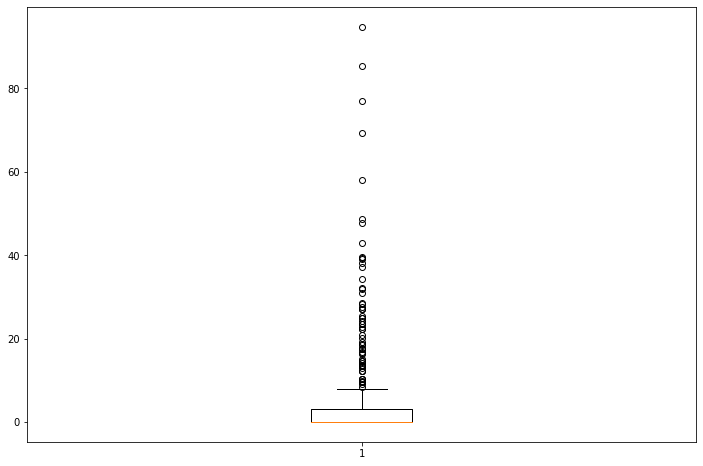

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.boxplot(df.chuva);

Achar quantil = _p_ x _(n + 1)_, sendo _p_ a posição desejada e _n_ o número de dados

In [9]:
for column in df.columns[1:]:
    coluna = column

    Q1 = df[coluna].quantile(.25)
    Q3 = df[coluna].quantile(.75)

    IIQ = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    print('Coluna: ', coluna)
    print('IIQ: ', IIQ, '\nQ1: ', Q1, '\nQ3: ', Q3)
    print('Limite inferior: ', limite_inferior, '\nLimite superior: ', limite_superior)
    print('\n\n')

Coluna:  temp_media
IIQ:  4.260000000000002 
Q1:  19.02 
Q3:  23.28
Limite inferior:  12.629999999999997 
Limite superior:  29.67



Coluna:  temp_min
IIQ:  4.300000000000001 
Q1:  15.3 
Q3:  19.6
Limite inferior:  8.85 
Limite superior:  26.050000000000004



Coluna:  temp_max
IIQ:  5.599999999999998 
Q1:  23.8 
Q3:  29.4
Limite inferior:  15.400000000000004 
Limite superior:  37.8



Coluna:  chuva
IIQ:  3.2 
Q1:  0.0 
Q3:  3.2
Limite inferior:  -4.800000000000001 
Limite superior:  8.0



Coluna:  fds
IIQ:  1.0 
Q1:  0.0 
Q3:  1.0
Limite inferior:  -1.5 
Limite superior:  2.5



Coluna:  consumo
IIQ:  6623.0 
Q1:  22008.0 
Q3:  28631.0
Limite inferior:  12073.5 
Limite superior:  38565.5





In [10]:
selecao = (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)

In [11]:
print(df.shape, df[selecao].shape)

(365, 7) (365, 7)


In [12]:
df = df[selecao]

In [13]:
df

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [14]:
print('Consumo médio: ', df.consumo.mean())
print('Consumo médio em dias de chuva: ', df.query('chuva > 1').consumo.mean())
print('Consumo médio em dias de frio: ', df.query('temp_media < 15').consumo.mean())

Consumo médio:  25401.36712328767
Consumo médio em dias de chuva:  24342.380165289258
Consumo médio em dias de frio:  19757.333333333332


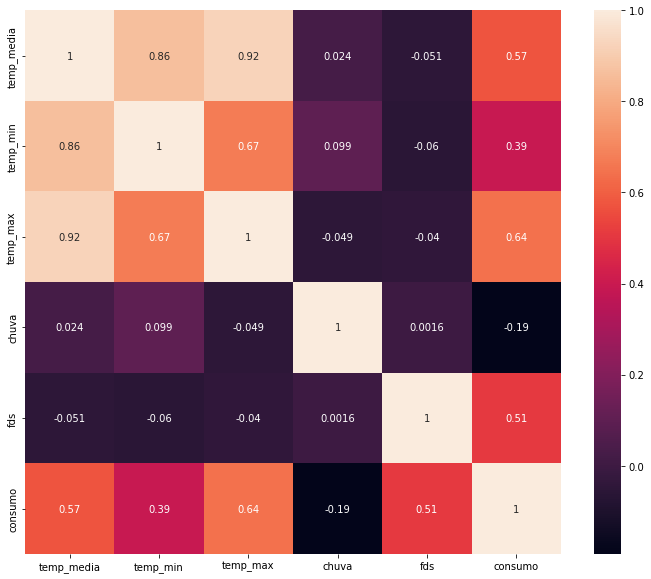

In [18]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot=True);

Coluna mais fortes preditoras pro consumo: temp_max e fds (porque temp_media e temp_min sao muito parecidas com temp_max).